In [1]:
import numpy as np
import pandas as pd


Loading FER2013 dataset...
Dataset loaded successfully!
Training samples: 28709
Testing samples: 7178


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Training started...
Epoch 1/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.3275 - loss: 1.6883 - val_accuracy: 0.4248 - val_loss: 1.5065
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.4294 - loss: 1.4837 - val_accuracy: 0.4697 - val_loss: 1.3850
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.4664 - loss: 1.3894 - val_accuracy: 0.4929 - val_loss: 1.3279
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.4918 - loss: 1.3220 - val_accuracy: 0.5017 - val_loss: 1.3136
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.5141 - loss: 1.2642 - val_accuracy: 0.5044 - val_loss: 1.2916
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.5420 - loss: 1.2119 - val_accuracy: 0.5223 - val_loss: 1.2505
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.5664 - loss: 1.1517 - val_accuracy: 0.5294 - val_loss: 1.2477
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.57

Training complete!
✅ Model saved as emotion_model_simple.h5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5315 - loss: 1.7573
Test Accuracy: 53.15%


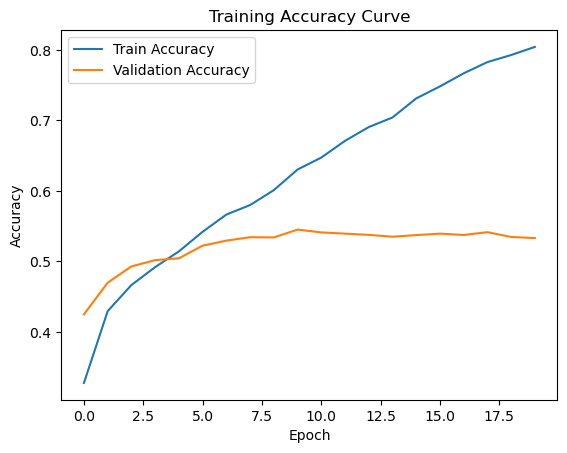

In [10]:
# train_emotion_model.py

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

print("Loading FER2013 dataset...")

# Load dataset
df = pd.read_csv('fer2013.csv')
print("Dataset loaded successfully!")

# Prepare images and labels
X, y = [], []
for i in range(len(df)):
    pixels = np.array(df['pixels'][i].split(), dtype='float32')
    X.append(pixels.reshape(48, 48, 1))
    y.append(df['emotion'][i])

X = np.array(X) / 255.0
y = to_categorical(y, num_classes=7)

# Split dataset
train_idx = df['Usage'] == 'Training'
test_idx = df['Usage'] != 'Training'

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
print("Training started...")
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)
print("Training complete!")

# Save model
model.save('emotion_model_simple.h5')
print("✅ Model saved as emotion_model_simple.h5")

# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import Image, ImageTk
import cv2
import numpy as np
import tensorflow as tf

# -------------------------
# Load Model
# -------------------------
try:
    model = tf.keras.models.load_model("emotion_model_simple.h5")
except Exception as e:
    print("Error loading model:", e)
    model = None

EMOTIONS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# -------------------------
# Helper Functions
# -------------------------
def preprocess_face(img):
    """Convert to gray, resize 48x48, normalize, expand dims."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (48, 48))
    face = face.astype("float32") / 255.0
    face = np.expand_dims(face, axis=-1)
    face = np.expand_dims(face, axis=0)
    return face

def predict_emotion(face_img):
    preds = model.predict(face_img)[0]
    label = EMOTIONS[np.argmax(preds)]
    conf = preds[np.argmax(preds)]
    return label, conf

# -------------------------
# Image Upload Function
# -------------------------
def upload_image():
    file_path = filedialog.askopenfilename(
        filetypes=[("Image Files", "*.jpg *.jpeg *.png")]
    )
    if not file_path:
        return
    img = cv2.imread(file_path)
    if img is None:
        messagebox.showerror("Error", "Could not open image.")
        return

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        messagebox.showinfo("Result", "No face detected.")
        return

    for (x, y, w, h) in faces:
        roi = img[y:y+h, x:x+w]
        face_input = preprocess_face(roi)
        label, conf = predict_emotion(face_input)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(img, f"{label} ({conf*100:.1f}%)", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    show_image(img, f"Detected: {label}")

# -------------------------
# Live Camera Function
# -------------------------
def start_live_camera():
    if model is None:
        messagebox.showerror("Error", "Model not loaded!")
        return

    cap = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            roi = frame[y:y+h, x:x+w]
            face_input = preprocess_face(roi)
            label, conf = predict_emotion(face_input)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, f"{label} ({conf*100:.1f}%)", (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)

        cv2.imshow("Live Emotion Detection (Press 'q' to quit)", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# -------------------------
# Display Processed Image in GUI
# -------------------------
def show_image(cv_img, title="Image"):
    rgb_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(rgb_img)
    img_pil.thumbnail((400, 400))
    img_tk = ImageTk.PhotoImage(img_pil)
    panel.configure(image=img_tk)
    panel.image = img_tk
    result_label.config(text=title)

# -------------------------
# GUI Setup
# -------------------------
root = tk.Tk()
root.title("Emotion Recognition (Deep Learning)")
root.geometry("500x600")
root.config(bg="#f2f2f2")

title = tk.Label(root, text="Facial Emotion Recognition", font=("Arial", 18, "bold"), bg="#f2f2f2", fg="#333")
title.pack(pady=15)

panel = tk.Label(root, bg="#ddd")
panel.pack(pady=10)

btn_frame = tk.Frame(root, bg="#f2f2f2")
btn_frame.pack(pady=10)

upload_btn = tk.Button(btn_frame, text="Upload Image", font=("Arial", 12), width=15, command=upload_image)
upload_btn.grid(row=0, column=0, padx=10)

live_btn = tk.Button(btn_frame, text="Start Live Camera", font=("Arial", 12), width=15, command=start_live_camera)
live_btn.grid(row=0, column=1, padx=10)

result_label = tk.Label(root, text="", font=("Arial", 14, "bold"), bg="#f2f2f2", fg="#444")
result_label.pack(pady=20)

exit_btn = tk.Button(root, text="Exit", font=("Arial", 12), width=10, command=root.destroy)
exit_btn.pack(pady=10)

root.mainloop()
